In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = 20, 10

In [2]:
from data_preprocsssing import *
from pricing_models import *
from hedging_strategies import *
import numpy as np

In [3]:
d_df, d_tkr2info = load_derivatives_df_n_cast()
d_op_df, u_op_df, d_cp_df, u_cp_df = get_mkt_data_minutes(d_df)
d_t_df = add_info2p_df(d_op_df)

op_iv_dct = gen_p_iv_gks_dct(d_df["d_code"], d_t_df, u_op_df, d_tkr2info)

# pw_mat: (inst count + 1, bars, 1)
pw_mat = -1 * np.ones((d_op_df.shape[1] + 1, d_op_df.shape[0], 1), dtype=float)
pw_mat[-1, :, 0] = 0.0
w_df, hr_df = calc_hedge_w_n_expo(op_iv_dct, u_op_df, pw_mat, (-1,))
pw_pnl_df, hg_pnl_df = calc_portfolio_pnl(w_df, d_op_df, u_op_df, pw_mat)

C:\Users\hoore\miniconda3\envs\work\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [4]:
w_df

,10002231.SH,10002232.SH,10002233.SH,10002234.SH,10002235.SH,10002236.SH,10002237.SH,10002238.SH,10002239.SH,10002240.SH,...,10002566.SH,10002569.SH,10002570.SH,10002571.SH,10002572.SH,10002577.SH,10002578.SH,10002579.SH,10002580.SH,510050.SH
2020-01-23 10:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.037887
2020-01-23 10:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.902172
2020-01-23 11:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.729090
2020-01-23 11:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.753156
2020-01-23 13:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.097107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-22 11:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.934150
2020-06-22 13:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.253089
2020-06-22 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.643909
2020-06-22 14:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.496682


In [5]:
hr_df

,d_p,delta,gamma,rho,theta,vega
2020-01-23 10:00:00,2.699267,0.000022,-11.543155,-0.017054,0.006017,-0.081319
2020-01-23 10:30:00,2.391958,0.000007,-11.811995,-0.015522,0.005953,-0.080144
2020-01-23 11:00:00,1.810135,-0.000010,-11.833949,-0.013251,0.006176,-0.078314
2020-01-23 11:30:00,1.849087,-0.000005,-11.528412,-0.013499,0.006197,-0.078903
2020-01-23 13:30:00,2.758349,0.000018,-10.028051,-0.017839,0.005895,-0.070339
...,...,...,...,...,...,...
2020-06-22 11:30:00,1.129897,0.000001,-83.837548,-0.000070,3.520834,-0.035056
2020-06-22 13:30:00,2.038958,-0.000023,-84.163760,-0.000109,3.508193,-0.035071
2020-06-22 14:00:00,5.647913,0.000009,-87.167806,-0.000167,3.550203,-0.035730
2020-06-22 14:30:00,-8.754102,0.000011,-83.596740,0.000151,3.358492,-0.033849


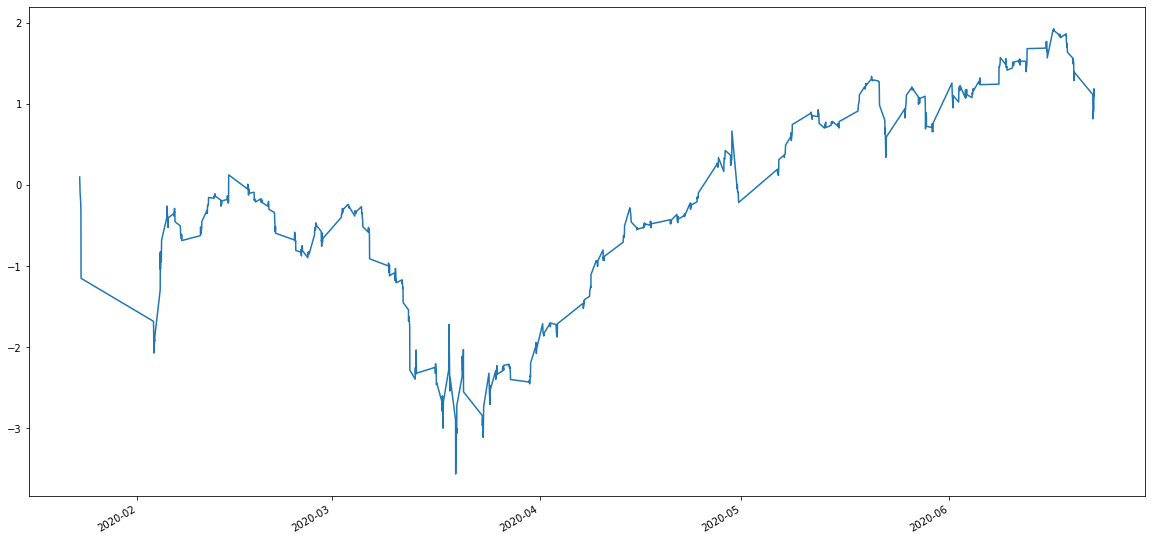

In [6]:
(pw_pnl_df.cumsum() + hg_pnl_df.cumsum()).plot()